In [98]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [93]:
df = pd.read_csv('clean_data.csv')
df.head()

,movie,original_title,genres,directors,production_budget,domestic_gross,worldwide_gross,TN_year,TN_month
0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",nm0551128,410600000.0,241063875.0,1.045664e+09,2011,May
1,Dark Phoenix,Dark Phoenix,"Action,Adventure,Sci-Fi",nm1334526,350000000.0,42762350.0,1.497624e+08,2019,Jun
2,Avengers: Age of Ultron,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",nm0923736,330600000.0,459005868.0,1.403014e+09,2015,May
3,Avengers: Infinity War,Avengers: Infinity War,"Action,Adventure,Sci-Fi","nm0751577,nm0751648",300000000.0,678815482.0,2.048134e+09,2018,Apr
4,Justice League,Justice League,"Action,Adventure,Fantasy",nm0811583,300000000.0,229024295.0,6.559452e+08,2017,Nov


In [106]:
# Calculating the domestic/worldwide profit and putting them in new columns
df['domestic_profit'] = df['domestic_gross'] - df['production_budget']
df['worldwide_profit'] = df['worldwide_gross'] - df['production_budget']

In [107]:
df.head()

,movie,original_title,genres,directors,production_budget,domestic_gross,worldwide_gross,TN_year,TN_month,domestic_profit,worldwide_profit
0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",nm0551128,410600000.0,241063875.0,1.045664e+09,2011,May,-169536125.0,6.350639e+08
1,Dark Phoenix,Dark Phoenix,"Action,Adventure,Sci-Fi",nm1334526,350000000.0,42762350.0,1.497624e+08,2019,Jun,-307237650.0,-2.002376e+08
2,Avengers: Age of Ultron,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",nm0923736,330600000.0,459005868.0,1.403014e+09,2015,May,128405868.0,1.072414e+09
3,Avengers: Infinity War,Avengers: Infinity War,"Action,Adventure,Sci-Fi","nm0751577,nm0751648",300000000.0,678815482.0,2.048134e+09,2018,Apr,378815482.0,1.748134e+09
4,Justice League,Justice League,"Action,Adventure,Fantasy",nm0811583,300000000.0,229024295.0,6.559452e+08,2017,Nov,-70975705.0,3.559452e+08


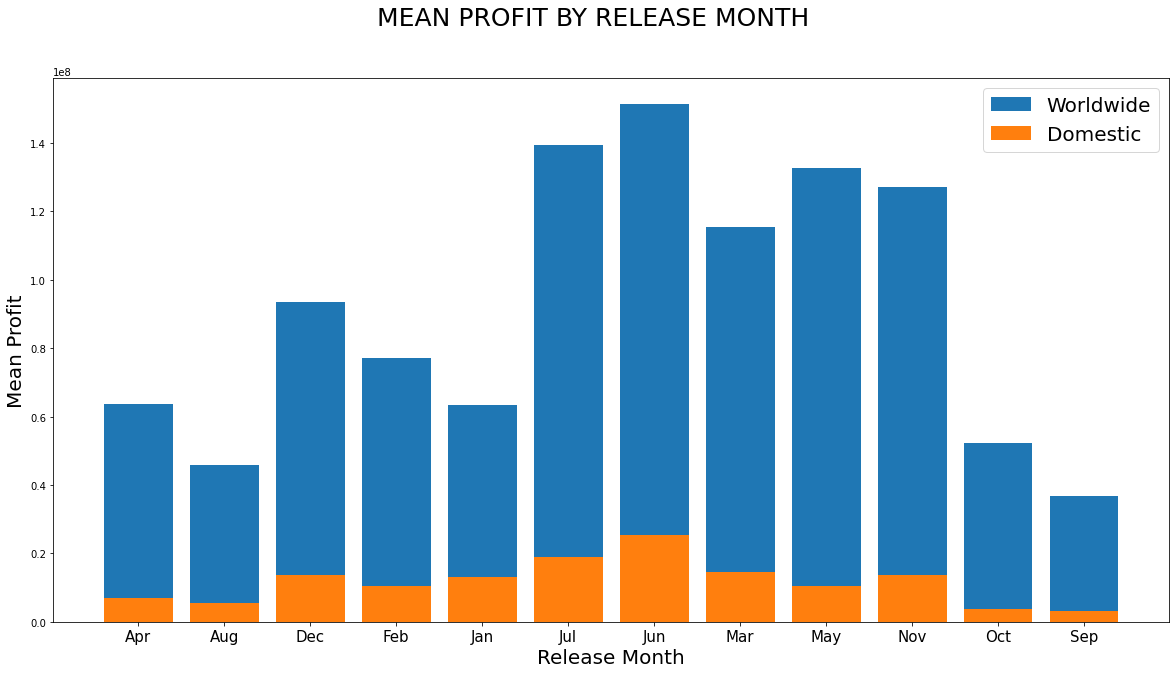

In [108]:
# calculating the mean profit for each month
domestic_profit = df.groupby('TN_month')['domestic_profit'].mean()
worldwide_profit = df.groupby('TN_month')['worldwide_profit'].mean()

# Plotting the Release Months against the Mean Profit for that month (Both worldwide and Domestic)
fig, ax = plt.subplots(figsize=(20, 10))

x = domestic_profit.index
y1 = worldwide_profit.values
y2 = domestic_profit.values

ax.bar(x,y1)
ax.bar(x,y2)
ax.tick_params(axis='x', labelsize= 15)
ax.set_xlabel('Release Month', fontsize= 20)
ax.set_ylabel('Mean Profit',fontsize= 20)
plt.suptitle('MEAN PROFIT BY RELEASE MONTH', fontsize= 25)

ax.legend(['Worldwide', 'Domestic'], fontsize= 20)
ax.set_ylim(0);